In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# NO LAB NEXT WEEK! ;( 

# But standard office hours today and next week!
# Open office hours available with other TAs (details to come)

# <u> How to Study for the Final <u> # 
## - START NOW!
## - Class slides
## - Know the terms from class handouts (only given out in class)
## - Go through each homework (Particularly concept questions)!

# <u> Concepts Worth Reviewing! <u> 
    
##    - Causal Inference (Remember John Snow!)
##    - Distributions (Uniform and Normal!)
##    - CLT and LLN
##    - Type I and Type II error
##    - Basics of Correlation and Regression (and their differences!)
##    - Basics of Prediction (Regression, RMSE, KNN)
##    - Basic Graphs and when to use them (line plot, histogram, scatter plot, bar plot, etc)
##    - Ethics - Four Principles (Review it!)
##    - Code (Review it!)

# <u> Correlation $\not = $ Regression <u>

## Let's see this for ourselves

In [4]:
x = np.random.randint(100,size = 100)

In [5]:
x

array([ 0, 17, 69,  3, 97, 44, 40,  7, 50, 63, 76,  6, 22, 29, 96,  6, 16,
       14, 87, 90,  3, 28,  9, 97, 37, 75, 10, 72, 78, 54, 56, 90, 99, 24,
       54,  3, 90, 42, 59, 75, 50, 83, 59, 46, 65, 72, 57, 25, 30, 71, 15,
       25, 30, 81, 51, 23,  4,  2, 18, 36, 31, 60, 53,  0, 26, 76, 22, 45,
       22, 63, 63, 68, 64, 34, 13, 73, 57, 42, 21, 27, 98, 97, 37,  4, 39,
        0, 38, 20, 73, 39, 80, 24, 94, 84, 93, 34, 93, 81, 46,  7])

(array([14.,  7., 14., 11.,  7., 11.,  8., 10.,  6., 12.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

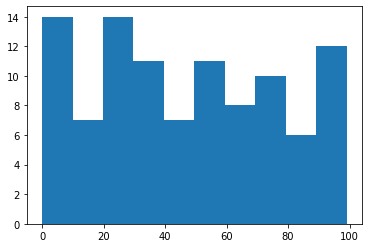

In [6]:
plt.hist(x)

In [7]:
noise = np.random.normal(scale = 50, size = 100)

(array([ 1.,  4., 16., 24., 16., 19., 13.,  4.,  2.,  1.]),
 array([-138.28419441, -107.77825551,  -77.27231661,  -46.7663777 ,
         -16.2604388 ,   14.2455001 ,   44.751439  ,   75.2573779 ,
         105.7633168 ,  136.2692557 ,  166.7751946 ]),
 <a list of 10 Patch objects>)

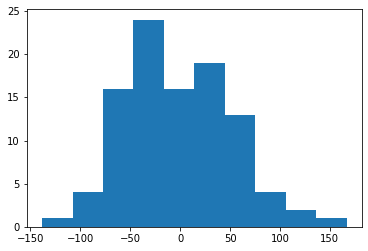

In [9]:
plt.hist(noise)

In [10]:
y = 5*x + noise

In [11]:
y

array([ 14.67533253,  45.97427554, 385.95340258,  51.11488743,
       346.71580559, 308.45693979, 118.66105783,  36.71705965,
       226.2462877 , 249.55853634, 433.35987443,  32.02819935,
        64.08331557, 184.70260275, 477.22648161,   5.53277689,
       169.56937265,  26.95340105, 425.86341987, 433.5447862 ,
       -79.46324405,  81.64444961,  27.32723265, 501.44773169,
       181.12069578, 384.64683141,  92.64366197, 400.79954445,
       443.37233451, 231.79245223, 396.39478691, 395.60070421,
       535.40519638, 125.12670881, 436.7751946 ,  22.73399083,
       402.54376072, 182.83281774, 236.59280344, 359.71812672,
       218.30275509, 383.56405812, 326.98194821, 143.80563363,
       256.01125206, 311.84173797, 331.45765457, 107.76065871,
       148.23376977, 397.00149666,  39.3995142 , 108.50901217,
       110.4951095 , 460.7832311 , 316.15489464, 152.47768902,
        36.41482249,  67.9679602 ,  91.02552261, 233.1072739 ,
       125.79784873, 311.99860119, 238.37066027, -91.80

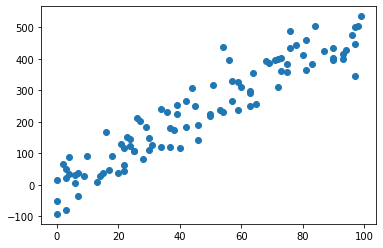

In [12]:
plt.scatter(x,y)

# What's the Correlation?
## This is $ R$

In [13]:
np.corrcoef(x,y)

array([[1.        , 0.94304695],
       [0.94304695, 1.        ]])

# So $R^2$ is..

In [14]:
np.corrcoef(x,y)[0][1]**2

0.8893375588983575

# So $R$ is the Correlation, and $R^2$ is the amount of variance they explain in one another!

# How does this relate to regression?

# Let's run one

In [15]:
Xc = sm.add_constant(x)
est = sm.OLS(y, Xc).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     787.6
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.22e-48
Time:                        15:37:16   Log-Likelihood:                -538.35
No. Observations:                 100   AIC:                             1081.
Df Residuals:                      98   BIC:                             1086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9049      9.922     -0.192      0.8

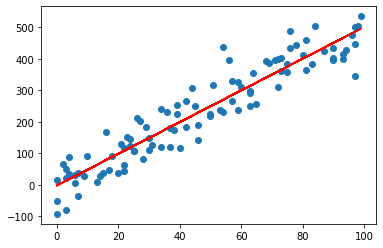

In [16]:
preds = est.params[0] +  est.params[1]*x
plt.scatter(x,y)
plt.plot(x,preds, color = 'red')

# The coefficient is close to 5 - but not exactly 
# Notice the Coefficient $\not = $ Correlation!

# But our estimate of $R^2$ matches the regression estimate!
# Importantly, they are not always the same!
# In a simple case - one independent variables, then $Correlation^2 = R^2$ and we can say the model, or x, explains some percentage of the variance in Y

# If there are many dependent variables, then the $R^2$ from a regression will be higher than any individual correlations
# Let's see this:

In [17]:
a = np.random.randint(100,size = 100).reshape(100,-1)
b = np.random.randint(100,size = 100).reshape(100,-1)
noise2 = np.random.normal(scale = 20, size = 100).reshape(100,-1)

In [18]:
c = 5*a + -10*b + noise2

## Correlation between a and c is...

In [19]:
np.corrcoef(c.T,a.T)

array([[1.        , 0.49632672],
       [0.49632672, 1.        ]])

## Correlation between b and c is...

In [20]:
np.corrcoef(c.T,b.T)

array([[ 1.        , -0.87536039],
       [-0.87536039,  1.        ]])

# Now let's run a regression with both a and b as independent variables

In [21]:
ab = np.concatenate((a,b), axis=1)
ab_int = sm.add_constant(ab)
new_est = sm.OLS(c, ab_int).fit()
print(new_est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          1.36e-117
Time:                        15:41:52   Log-Likelihood:                -437.90
No. Observations:                 100   AIC:                             881.8
Df Residuals:                      97   BIC:                             889.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9370      5.300      0.743      0.4


 # <u> _Review_ _key_ _terms_ <u>
***

#  <u> P - Value: <u>
## The probability of observing this value under the null hypothesis (default null is zero!)
## NOT the probability the null is true!

#  <u> Confidence Interval <u>
## Given a confidence level X,  X% of confidence intervals will capture the true parameter given different samples 
## NOT that we are X% confident a given confidence interval contains the true parameter
## NOT that there is X% probability a given confidence interval contains the true parameter

# <u> Coefficient <u>
## The regression estimates that a one unit change in x is associated with a (insert coefficient size) change in y

# Again, Coefficient $\not = $ Correlation!

# $R^2$ tells us how much of the variance in y is being explained by the model, while the coefficient tell us the actual measure of the linear relationship.
# There is no direct connection between them!

# <u> Data Organization <u>

In [22]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Classic structure:
# Rows are observations, Columns are Covariates/Features/Characteristics

# <u> CODE <u>

# Basic Math

In [23]:
4 + 10

14

In [24]:
10/5

2.0

In [25]:
3**3

27

# What is the difference between = vs. == ??

In [26]:
t = 5

In [27]:
t

5

In [28]:
t == 10

False

# Ranges - Inclusive of the first number, exclusive of last

In [29]:
this_range = range(4,15)
print(list(this_range))

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [30]:
new_range = range(4,15,3)
print(list(new_range))

[4, 7, 10, 13]


# Data types
## - Lists [ ]
## - Dictionaries { }
## - Tuples ( )
## - Arrays (from numpy) np.array()

# Note that all of these can be iterated through in loops...
### Although dictionaries are a little more complicated

In [31]:
my_list = ['a',1, range(0,2), [1,2,3]]

for x in my_list:
    print(x)

a
1
range(0, 2)
[1, 2, 3]


In [32]:
my_dictionary = {"one":1, "two": 2, "three":3}

for key in my_dictionary:
    print(key, my_dictionary[key])

one 1
two 2
three 3


In [33]:
my_dictionary["two"]

2

## ... and while loops

In [34]:
x = 1

while x < 10:
    print(x)
    x = x +1


1
2
3
4
5
6
7
8
9


# Break vs. Continues
# Break says "END THIS LOOP!"
# Continue says "Stop this particular iteration, but please continue the loop"

In [35]:
numbers = range(0,10)
for this_number in numbers:
    if this_number != 5:
        print(this_number)
    else: 
        print("This will print!")
        break
        print("This will not print!")

0
1
2
3
4
This will print!


In [38]:
numbers = range(0,10)
for this_number in numbers:
    if this_number != 5:
        print(this_number)
    else: 
        print("This will print!")
        continue
        print("This will not print!")

0
1
2
3
4
This will print!
6
7
8
9


# Conditionals  -> if statements!
## Evaluated sequationally-> one after the other!

In [39]:
z = 20

if z > 20:
    print("bigger than 20")
elif z < 20:
    print("smaller than 20")
else:
    print("literally 20")
    

literally 20


In [41]:
z = 20

if z > 20:
    print("bigger than 20")
elif z == 20:
    print("literally 20")
if z < 50:
    print("less than 50")

literally 20
less than 50


# Functions 
## Always start with def
## then name
## then parenthesis for arguments
## then colon!

In [42]:
def my_func(x,y,z):
    return x + y + z

my_func(5,10,12)

27

In [51]:
def my_func_alt(x,y,z):
    answer = x + y + z
    print(answer)
    return answer

#my_func_alt(5,10,12)

In [44]:
test = my_func(5,10,12)

In [45]:
test

27

In [52]:
test2 = my_func_alt(5,10,12)

27


In [53]:
print(test2)

27


# "invisible functions" or Lambdas
# simple structure
# type "Lambda", arguments, colon, what to do to do them
# automatically returns then after they've been manipulated

In [54]:
my_lam = lambda x: x**2
my_lam(4)

def my_new_func(x):
    return x**2

16

In [55]:
other_lam = lambda x,y,z: x + y + z 
test3 = other_lam(5,10,12)

In [56]:
test3

27

# Questions?
# Topics?

# Start Studying Now!

# What to take for Data Science?

## Datascience is not a unified field. It is a combination of CS, Math, and Statistics, with a significant amount of outside theory and intuition. There is no one way to make or be a datascientist - its a diverse skills set.

## That said, there are certain key skills. These are necessary for a deep understanding what you are doing and why, and are worth pursing if you want to be a datascientist or work primarily with data. 

## Finally, classes are scarce/expensive. Figure out what you want to learn and pursue that. Don't waste classes.

# MATH/Stats - critical
### - Calculus 1-3 (up to multivariate calculus)
### - Probability Theory
### - Linear Algebra (two semesters)
### - Real Analysis (optional)
### - Mathematical Statistics
### - Econometrics (optional but key for social science)

# CS/Programming
### - Python ! 
### - R (also useful)
### - Fundamental Algorithms (optional)
### - Big data/Databases (optional)
 
# Datascience Classes
### - Machine Learning  
### - Deep Learning (optional)
### - Natural Languate Processessing (optional)
### - Causal Inference 


